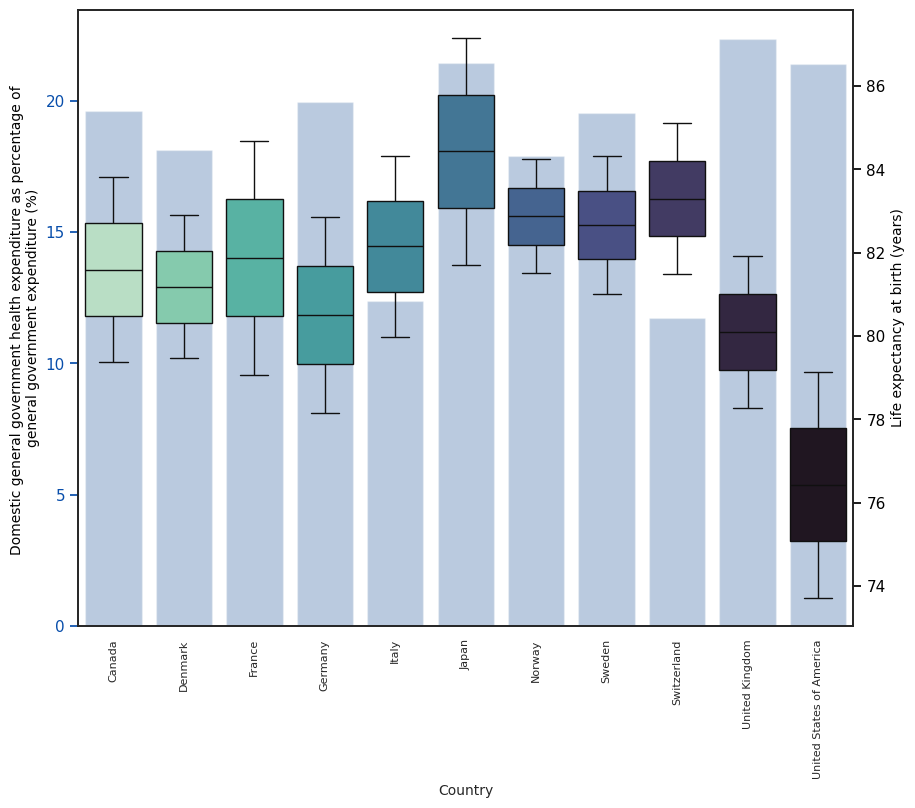

In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# For displaying all columns in dataframes
pd.set_option('display.max_columns', None)

# Import packages for data processing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Import packages for data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder

# For metrics and helpful functions
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, \
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

# Import data csv file
data = pd.read_csv('web_download_data_WHO.csv')

# Select countries and indicators to filter
countries = ['Canada','Denmark','France','Germany','Italy','Japan','Norway',
             'Sweden','Switzerland','United Kingdom','United States of America']

indicators = ['Life expectancy at birth (years)' ,
            'Domestic general government health expenditure (GGHE-D) as percentage of '
            'general government expenditure (GGE) (%)']

# Create mask based on filters
mask = ((data['DIM_1_CODE'] != 'SEX_BTSX') &
        (data['DIM_GEO_NAME'].isin(countries)) &
        (data['IND_NAME'].isin(indicators)))


# Apply mask to data
data = data[mask]

# Conditions for new Life_Expectancy_Category column
condition1 = ((data['IND_NAME'] == 'Life expectancy at birth (years)')
  & (data['VALUE_NUMERIC'] <= 65))
condition2 = ((data['IND_NAME'] == 'Life expectancy at birth (years)')
  & ((data['VALUE_NUMERIC'] > 65))
  & ((data['VALUE_NUMERIC'] <= 75)))
condition3 = ((data['IND_NAME'] == 'Life expectancy at birth (years)')
  & (data['VALUE_NUMERIC'] > 75))

# Values to assign for new Life_Expectancy_Category column
value1 = 'Low'
value2 = 'Medium'
value3 = 'High'
defaultvalue = 'NA'

# Create column Life_Expectancy_Category
data['Life_Expectancy_Category'] = np.select([condition1, condition2,
                                               condition3],
                                                [value1, value2, value3],
                                              default=defaultvalue)

data = data.pivot(index=['DIM_GEO_NAME','DIM_TIME_YEAR','DIM_1_CODE',
                               'Life_Expectancy_Category'],
                        columns='IND_NAME', values='VALUE_NUMERIC')

data = data.reset_index()

# Set background color
sns.set_style('ticks', {'grid.color': '0', 'grid.linestyle': '-','axes.facecolor': 'white'})
sns.set_theme(style='white')
sns.set_context('notebook')

fig, ax1 = plt.subplots(figsize=(10, 8))

ax2 = ax1.twinx()

sns.barplot(x='DIM_GEO_NAME',
            y='Domestic general government health expenditure (GGHE-D) as percentage of '
            'general government expenditure (GGE) (%)',
            data=data, ax=ax1, color='#084EAB', alpha=0.3)

ax1.set_xlabel('Country', fontsize=10)
ax1.tick_params(axis='x', labelsize=8, rotation=90)

ax1.set_ylabel('Domestic general government health expenditure as percentage of \n' +
          'general government expenditure (%)', fontsize=10, color='black')
ax1.tick_params(axis='y', colors='#084EAB')

sns.boxplot(x='DIM_GEO_NAME',
            y='Life expectancy at birth (years)',
            data=data, ax=ax2,
            hue='DIM_GEO_NAME', palette='mako_r')

ax2.set_ylabel('Life expectancy at birth (years)', fontsize=10, color='black')
ax2.tick_params(axis='y', colors='black')

plt.show()